# Dynamical Decoupling (DD) Simulation
## Specific case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [3]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [4]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [6]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845829024


### Graph t vs $\epsilon$

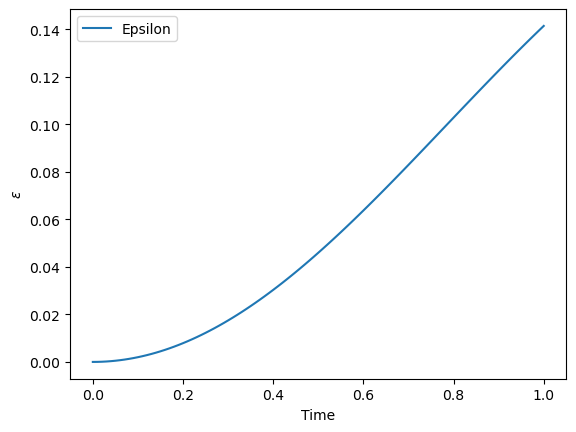

In [8]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previous case is the following:\
Ideal system: **$e^{-iZs_1T}e^{-iZs_2T}e^{-iZs_3T}...e^{-iZs_mT}$** \
Noisy system: **$e^{-i(Z+\lambda{X})s_1T}e^{-i(Z+\lambda{X})s_2T}e^{-i(Z+\lambda{X})s_3T}...e^{-i(Z+\lambda{X})s_mT}$**
##### Error function:
**$\epsilon=||(e^{-i(Z+\lambda{X})s_1T}Ze^{-i(Z+\lambda{X})s_2T}Ze^{-i(Z+\lambda{X})s_3T}Ze^{-i(Z+\lambda{X})s_4T}Z...Ze^{-i(Z+\lambda{X})s_mT}Z) - e^{-iZT}||$**
### Simulation


In [10]:
def error_calculation(lambda_value, m, T, areEqual, s_values):
    prev_A = I
    
    # Case 1: Periodic DD when s1 = s2 = ... = sm 
    if (areEqual == True):
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0): 
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*T/m)) 
                #prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*T/m))
                #prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            # updating the matrix A
            prev_A = A
    
    # Case 2: Concatenated DD or Uhrig DD when s has a different values       
    else:
        i = 1
        # simulating the equation 
        for s in s_values:
            # even numbers
            if (i%2 == 0):
                A = np.dot(prev_A, expm(-1j*(Z-lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z-lambda_value*X)*s*T)   
            # odd numbers
            else:
                A = np.dot(prev_A, expm(-1j*(Z+lambda_value*X)*s*T))
                # prev_A * expm(-1j*(Z+lambda_value*X)*s*T)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1 
            
    B = expm(-1j*Z*T) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

def UDD_calculate_s_values(m):
    s_values = []
    prev_t = 0
    for j in range(1, m+1):
        t = np.power(np.sin(j*np.pi/(2*m)), 2)
        s_values.append(t-prev_t)
        prev_t = t
    return s_values        


In [11]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
m_value_c3 = [2,3,4,6,8,10]
error_c1 = []
error_c2 = []
error_c3 = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 (PDD) Even ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 (CDD) ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [1/2,1/2]))
print("For m = 2 the error is " + str(error_c2[0]))

error_c2.append(error_calculation(lambda_value, 3, T, False, [1/4,1/2,1/4]))
print("For m = 3 the error is " + str(error_c2[1]))

error_c2.append(error_calculation(lambda_value, 6, T, False, [1/8,1/4,1/8,1/8,1/4,1/8]))
print("For m = 6 the error is " + str(error_c2[2]))

error_c2.append(error_calculation(lambda_value, 11, T, False, [1/16,1/8,1/16,1/16,1/8,1/8,1/8,1/16,1/16,1/8,1/16]))
print("For m = 11 the error is " + str(error_c2[3]))


print("\nCase 3 (UDD) ##########################")
error_c3.append(error_calculation(lambda_value, 2, T, False, UDD_calculate_s_values(2)))
print("For m = 2 the error is " + str(error_c3[0]))

error_c3.append(error_calculation(lambda_value, 3, T, False, UDD_calculate_s_values(3)))
print("For m = 3 the error is " + str(error_c3[1]))

error_c3.append(error_calculation(lambda_value, 4, T, False, UDD_calculate_s_values(4)))
print("For m = 4 the error is " + str(error_c3[2]))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(6)))
print("For m = 6 the error is " + str(error_c3[3]))
print(UDD_calculate_s_values(6))

error_c3.append(error_calculation(lambda_value, 6, T, False, UDD_calculate_s_values(8)))
print("For m = 8 the error is " + str(error_c3[4]))
print(UDD_calculate_s_values(8))


error_c3.append(error_calculation(lambda_value, 10, T, False, UDD_calculate_s_values(10)))
print("For m = 10 the error is " + str(error_c3[5]))
print(UDD_calculate_s_values(10))


Case 1 (PDD) Even ##########################
For m = 2 the error is 0.0004995820845829024
For m = 4 the error is 0.0002496353782160249
For m = 6 the error is 0.00016640438462257455
For m = 8 the error is 0.0001247982491792856
For m = 10 the error is 9.983673349871192e-05

Case 2 (CDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.249909813324557e-05
For m = 6 the error is 1.8775597696427797e-07
For m = 11 the error is 2.606462738292785e-08

Case 3 (UDD) ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.2499098133243837e-05
For m = 4 the error is 2.9031863259118986e-07
For m = 6 the error is 8.175186760529897e-08
[0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059]
For m = 8 the error is 4.455600939580585e-08
[0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 0

In [12]:
# values found below

m_values_optimized = [2,3,4,6,8,10]  
error_optimized = [0.0004995710092228119,4.571626303785287e-10,1.3185843644749708e-09,6.570497960815582e-10,1.303151245245274e-09,6.195767679163424e-10]

### Graph t vs $\epsilon$

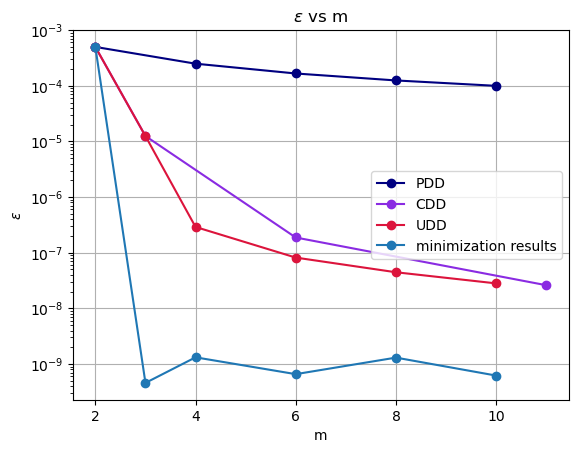

In [14]:
# graph the changes of the error for different values of m

plt.plot(m_value_c1, error_c1, color='navy', marker='o', label = "PDD")
plt.plot(m_value_c2, error_c2, color='blueviolet', marker='o', label = "CDD")
plt.plot(m_value_c3, error_c3, color='crimson', marker='o', label = "UDD")
plt.plot(m_values_optimized, error_optimized, marker='o', label = "minimization results")


plt.title('$\epsilon$ vs m')
plt.xlabel('m')
plt.ylabel('$\epsilon$')
plt.yscale("log")

plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()


## Minimize the $\epsilon$ function for a fixed T = 0.1 and m


### $\lambda\$ = 0.1 

In [17]:
def epsilon_func(s_values):
    i = 1
    prev_A = I
    lambda_value = 0.1
    T = 0.1
    # simulating the equation 
    for s in s_values:
        # even numbers
        if (i%2 == 0):
            A = prev_A @ expm(-1j*(Z-lambda_value*X)*s*T)   
        # odd numbers
        else:
            A = prev_A @ expm(-1j*(Z+lambda_value*X)*s*T)
        # updating variables
        prev_A = A 
        i+=1 
    difference = A - expm(-1j*Z*T)
    eigenvalues = svd(difference, compute_uv = False)
    epsilon = np.max(eigenvalues)
    return epsilon   

def minimize_epsilon_SLSQP(m, s_values_start):
    s_result = []
    # Define constraints
    const = ({'type':'eq',
              'fun' : lambda s_values : (np.sum(s_values) - 1)})
    # Bounds of Si
    bounds = ((0,1) for _ in range(m))

    # Options
    options = {'disp' : False,
               'ftol' : 1e-12}

    # Minimization
    result = spo.minimize(epsilon_func, s_values_start, method='SLSQP', options=options, constraints = const, bounds = bounds)

    epsilon = result.fun
    for i in range(m):
        si = result.x[i]
        s_result.append(si)
    
    return s_result, epsilon 

def minimize_epsilon_BFGS(m, s_values_start):
    s_result = []
    # Bounds of Si
    bounds = ((0,1) for _ in range(m))

    # Options
    options = {'disp'    : False,
               'ftol'    : 1e-12,
               'maxiter' : 1000}
    
    # Minimization
    result = spo.minimize(epsilon_func, s_values_start, method='L-BFGS-B', options= options, bounds = bounds)

    epsilon = result.fun
    for i in range(m):
        si = result.x[i]
        s_result.append(si)
        
    return s_result, epsilon 

def return_min_value(iterations, m_value, method):
    hashmap_epsilon_to_s = {}
    if(method == 'SLSQP'):
        # random initial values
        for i in range(iterations):
            s_values, epsilon = minimize_epsilon_SLSQP(m_value,[np.random.random() for _ in range(m_value)])
            hashmap_epsilon_to_s[epsilon] = s_values
        # evenly separated initial values
        s_values, epsilon = minimize_epsilon_SLSQP(m_value, [1/m_value for _ in range(m_value)])
        hashmap_epsilon_to_s[epsilon] = s_values
        # s-values of UDD
        s_values, epsilon = minimize_epsilon_SLSQP(m_value, UDD_calculate_s_values(m_value))
        hashmap_epsilon_to_s[epsilon] = s_values
        
    elif(method == 'L-BFGS-B'):
        # random initial values
        for i in range(iterations):
            s_values, epsilon = minimize_epsilon_BFGS(m_value,[np.random.random() for _ in range(m_value)])
            hashmap_epsilon_to_s[epsilon] = s_values
        # evenly separated initial values
        s_values, epsilon = minimize_epsilon_BFGS(m_value, [1/m_value for _ in range(m_value)])
        hashmap_epsilon_to_s[epsilon] = s_values
        # s-values of UDD
        s_values, epsilon = minimize_epsilon_BFGS(m_value, UDD_calculate_s_values(m_value))
        hashmap_epsilon_to_s[epsilon] = s_values
            
    else:
        print("invalid method")

    #print(hashmap_epsilon_to_s) 
    min_value = min(hashmap_epsilon_to_s)
    
    return min_value, hashmap_epsilon_to_s[min_value] 


#### When m = 2

In [19]:
m_value = 2

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  0.0004995820845829022  s_values:  [0.4999999999859441, 0.5000000000140559]
L-BFGS-B METHOD: Minimum error =  0.000499571009222832  s_values:  [0.499983364564483, 0.4999833656527384]


In [20]:
print(epsilon_func([0.49998361065319974, 0.49998361065319974]))
print(epsilon_func([0.4999837890188431, 0.4999833220272216]))
print(epsilon_func([0.49998336258508624,0.49998337866864523]))
print(epsilon_func([0.4999833648036424,0.499983365617878]))

# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.4999999999999999, 0.5000000000000001]))
print(epsilon_func([0.49999999991086985, 0.50000000008913]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.4999833655591059, 0.49998336523893533]))
print(epsilon_func([0.4999833675827254, 0.4999833660701465]))

0.0004995710115871328
0.0004995710106577283
0.0004995710092230183
0.0004995710092228119
Minimum values found by SLSQP Method
0.0004995820845829024
0.0004995820845829022
Minimum values found by L-BFGS-B Method
0.0004995710092227769
0.0004995710092226035


#### When m = 3

In [22]:
m_value = 3

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

#options
#options = {'disp'    : True,
#           'eps'     : 1e-10,
#           'maxiter' : 1000,
#           'ftol'    : 1e-10}



SLSQP METHOD: Minimum error =  4.162997043622055e-07  s_values:  [0.2503126943683055, 0.499374611218172, 0.2503126944135225]
L-BFGS-B METHOD: Minimum error =  7.817423136003157e-11  s_values:  [0.2503137074860753, 0.4993766861007775, 0.25031376904783176]


In [23]:
# lowest found
print(epsilon_func([0.2503131326075795, 0.4993768041187886, 0.25031423701763944]))
#s1 =  0.25031269456576893  s2 =  0.49937461113734705  s3 =  0.2503126942968841
#4.16299704372454e-07
print(epsilon_func([0.25031269456576893,0.49937461113734705,0.2503126942968841]))
print(epsilon_func([0.2503139951814718,0.49937672578019454,0.2503134407280822]))
print(epsilon_func([0.250313782188061,0.4993766735025422,0.2503137106126561]))

s1 =  0.2503130334449466  
s2 =  0.49937393184986445  
s3 =  0.250313034705189
print(s1+s2+s3)
epsilon_func([s1,s2,s3])

# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.2503122685933116, 0.4993754354643486, 0.2503122959423398]))
print(epsilon_func([0.25031270183562715, 0.4993746113471729, 0.2503126868172]))
print(epsilon_func([0.2503126942322201, 0.49937461122542787, 0.250312694542352]))
print(epsilon_func([0.2503126942309021, 0.4993746112692983, 0.2503126944997997]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.2503136846427681, 0.49937672289764024, 0.25031375395430067]))
print(epsilon_func([0.250313761135165, 0.499376680102535, 0.25031372106888927]))
print(epsilon_func([0.2503137074860753, 0.4993766861007775, 0.25031376904783176]))


2.7011641425558947e-09
4.16299704372454e-07
9.637770643047125e-10
4.571626303785287e-10
1.0
Minimum values found by SLSQP Method
4.1662514929427086e-07
4.1629970465567674e-07
4.162997043690417e-07
4.1629970434291533e-07
Minimum values found by L-BFGS-B Method
7.413227887372243e-10
1.6462962811950578e-10


#### When m = 4


In [25]:
m_value = 4

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  2.022379330615787e-07  s_values:  [0.14652032059044803, 0.353479681868749, 0.3534796794126597, 0.14652031812814334]
L-BFGS-B METHOD: Minimum error =  1.1587775829472187e-10  s_values:  [0.16614280597213285, 0.37414686793828494, 0.3339591267076344, 0.12575327870472833]


In [26]:
print(epsilon_func([0.18260355134222295,0.3934429524912896,0.31758791595654123,0.10636778240906868]))
print(epsilon_func([0.11201090406009984,0.3221869714667899,0.3878254228854342,0.17797886271369787]))
print(epsilon_func([0.15660249719595007,0.36380421129713986,0.3434496115008143,0.13614572318190296]))
print(epsilon_func([0.16772630320693488,0.37592124270119004,0.3323840437689914,0.12397048978012597]))
print(epsilon_func([0.16006624314636198,0.36749355457507377,0.3400038084277212,0.13243844538176264]))
#lowest found

s1 =  0.03765566095204766  
s2 =  0.27063906421385175  
s3 =  0.4618681202205331  
s4 =  0.22984044745027865
print(s1+s2+s3+s4)
epsilon_func([s1,s2,s3,s4]) 

# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.14657893998012378, 0.35342105961862347, 0.3534210602510726, 0.1465789401501801]))
print(epsilon_func([0.14652031525235185, 0.3534796416866653, 0.353479695264094, 0.1465203477968889]))
print(epsilon_func([0.14652032059044803, 0.353479681868749, 0.3534796794126597, 0.14652031812814334]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.15224834583694077, 0.35927255063565744, 0.3477815452388683, 0.14069958732248306]))
print(epsilon_func([0.04593263522071234, 0.27550536294994166, 0.45362172125479183, 0.22494341195706952]))
print(epsilon_func([0.19607840632180618, 0.4107887714557183, 0.3041904200903709, 0.08894482473741044]))
print(epsilon_func([0.16614280597213285, 0.37414686793828494, 0.3339591267076344, 0.12575327870472833]))

2.028214955034198e-07
2.0229474578497696e-07
3.5239377130349133e-09
1.8201361302785667e-09
1.5676595736022162e-09
1.3185843644749708e-09
6.938793025667748e-10
1.000003292836711
Minimum values found by SLSQP Method
2.6139756841637346e-07
2.022380466746723e-07
2.022379330615787e-07
Minimum values found by L-BFGS-B Method
9.087513795412111e-10
2.0078117387401649e-10
1.8873173482955747e-10


#### When m = 6

In [28]:
m_value = 6

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  6.973664578598431e-08  s_values:  [0.08115803715423694, 0.19088757688004415, 0.21217126097154654, 0.21792587193270252, 0.20666020397943302, 0.09119704908203678]
L-BFGS-B METHOD: Minimum error =  1.5322952731012476e-10  s_values:  [0.18318333858053404, 0.19762749926476317, 0.0017600867329253978, 0.1976272306137198, 0.31525492323346144, 0.10454913737516315]


In [29]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.06698729810778066, 0.1830127018922193, 0.24999999999999994, 0.25, 0.18301270189221952, 0.06698729810778059]))
print(epsilon_func([0.10910832178667179, 0.22407446256631602, 0.16682740781295394, 0.16683724450407955, 0.22406431048024267, 0.10908825284973601]))
print(epsilon_func([0.10588111287187135, 0.23477599597343882, 0.20813314114895248, 0.17445904822125238, 0.18598807981730012, 0.09076262196718503]))
print(epsilon_func([0.08115803715423694, 0.19088757688004415, 0.21217126097154654, 0.21792587193270252, 0.20666020397943302, 0.09119704908203678]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.06698743390385065, 0.18301283768880242, 0.2500001357958963, 0.25000013579589675, 0.1830128376888011, 0.06698743390385282]))
print(epsilon_func([3.002568575565669e-11, 0.19226485891928957, 0.20052717820453525, 0.0968542222853414, 0.29898736358357786, 0.21136866390320677]))
print(epsilon_func([0.18318333858053404, 0.19762749926476317, 0.0017600867329253978, 0.1976272306137198, 0.31525492323346144, 0.10454913737516315]))

3.0892130263261764e-10
1.0000007644360716
Minimum values found by SLSQP Method
8.175186760529897e-08
7.705138206728516e-08
7.252268247101637e-08
Minimum values found by L-BFGS-B Method
3.233640543200108e-10
1.952486531829233e-10


#### When m = 8

In [31]:
m_value = 8

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  4.215670861686065e-08  s_values:  [0.08915004552240306, 0.16066103188805328, 0.11316580035396968, 0.13702439761109078, 0.13702366410074956, 0.11316639014088864, 0.1606604938519956, 0.08914817653084944]
L-BFGS-B METHOD: Minimum error =  1.8551315873894768e-10  s_values:  [0.14414799983607154, 0.3508429282575305, 0.17130062659794726, 5.579211705300236e-10, 0.1685937176538608, 0.006520042633380491, 0.015947561354118688, 0.142649130823024]


In [32]:
# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.03806023374435662, 0.10838637566236962, 0.16221167441072884, 0.1913417161825448, 0.19134171618254503, 0.1622116744107288, 0.10838637566236964, 0.03806023374435663]))
print(epsilon_func([0.08915028332374811, 0.16066107804400595, 0.11316561091250425, 0.13702441164206514, 0.13702361737515267, 0.11316624492816715, 0.16066046721461813, 0.08914828655973867]))
print(epsilon_func([0.08915004552240306, 0.16066103188805328, 0.11316580035396968, 0.13702439761109078, 0.13702366410074956, 0.11316639014088864, 0.1606604938519956, 0.08914817653084944]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.038060289197624234, 0.10838643111560388, 0.16221172986391613, 0.19134177163569888, 0.19134177163570046, 0.16221172986391763, 0.10838643111560466, 0.03806028919762364]))
print(epsilon_func([0.14414799983607154, 0.3508429282575305, 0.17130062659794726, 5.579211705300236e-10, 0.1685937176538608, 0.006520042633380491, 0.015947561354118688, 0.142649130823024]))

0.0032119266091353697
0.0038287232725517832
Minimum values found by SLSQP Method
4.455600939580585e-08
4.216038554660022e-08
4.215670861686065e-08
Minimum values found by L-BFGS-B Method
2.0185906699373124e-10


#### When m = 10

In [34]:
m_value = 10

epsilon, s_values = return_min_value(20, m_value, 'SLSQP')
print("SLSQP METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

epsilon, s_values = return_min_value(20, m_value, 'L-BFGS-B')
print("L-BFGS-B METHOD: Minimum error = ", epsilon, " s_values: ", s_values)

SLSQP METHOD: Minimum error =  2.6777631758866682e-08  s_values:  [0.07568406622439884, 0.12416062524225233, 0.08791055975462658, 0.1121677280036812, 0.10007795514711366, 0.10007792212745426, 0.11216738715940267, 0.08791025208764376, 0.12416003600225003, 0.07568346825117656]
L-BFGS-B METHOD: Minimum error =  1.5116691413025667e-10  s_values:  [0.024471769814348752, 0.07101978892202189, 0.1106158990031438, 0.13938415692065945, 0.1545085251493619, 0.15450852514936264, 0.1393841569206586, 0.11061589900314339, 0.07101978892202118, 0.02447176981434826]


In [35]:
#lowest found

s1 =  0.05364872685533633  
s2 =  0.14721064956475943  
s3 =  0.10233004848784125  
s4 =  0.09337909913391204  
s5 =  0.13074073761091892  
s6 =  0.0986948049530884  
s7 =  0.11486611070913687  
s8 =  0.06256525581307926  
s9 =  0.09828268275595599  
s10 =  0.0982822834359638

print(s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)
print(epsilon_func([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]))

print(epsilon_func([1.3832143212538895e-05,0.020171240809496914,0.1442138957198114,0.03857411216316778,0.08901720196922741,0.3702780729681437,0.23488945296172076,0.0706718608067379,0.03217222452389344, 3.2959598175463414e-10]))
print(epsilon_func([1.1248132237043405e-06,0.04512320843842305,0.024593384013038292,0.04527834728491069,0.2332676617591886,0.3199456675667349,0.16622576804101777,0.04481066813168081,0.07601596691112808,0.04473936994512728]))
print(epsilon_func([0.1335324423107373,0.1128366236347572,1.640200449533966e-07,0.08020625700012156,1.8506368887844792e-07,0.0964908437805906,0.1397637537215577,0.08315948326908801,0.2267050393626389,0.12730643955023305]))

#8.06804355409631e-10
#epsilon_func([0.2351430703273727,0.3154665641681026,-0.1666701178852503,0.0380625427310032,0.03931095646774125,0.07261701465054925,0.412494548256661,0.18287678730659268 ,-0.0199685790907167,-0.1093275489862226])

# Minimum values found by SLSQP Method
print("Minimum values found by SLSQP Method")
print(epsilon_func([0.024471741852423214, 0.07101976096010307, 0.11061587104123718, 0.13938412895876282, 0.15450849718747361, 0.15450849718747384, 0.13938412895876295, 0.11061587104123694, 0.0710197609601032, 0.02447174185242318]))
print(epsilon_func([0.07568415407737258, 0.12416067526200436, 0.08791043655425992, 0.11216779819442363, 0.10007789726161764, 0.10007787505413628, 0.11216743558212058, 0.0879101280674159, 0.124160054918517, 0.0756835450281322]))
print(epsilon_func([0.07568406622439884, 0.12416062524225233, 0.08791055975462658, 0.1121677280036812, 0.10007795514711366, 0.10007792212745426, 0.11216738715940267, 0.08791025208764376, 0.12416003600225003, 0.07568346825117656]))

# Minimum values found by L-BFGS-B Method
print("Minimum values found by L-BFGS-B Method")
print(epsilon_func([0.024471769814348752, 0.07101978892202189, 0.1106158990031438, 0.13938415692065945, 0.1545085251493619, 0.15450852514936264, 0.1393841569206586, 0.11061589900314339, 0.07101978892202118, 0.02447176981434826]))

1.0000003993199922
2.6648916945411316e-09
1.5548200284543092e-09
6.195767679163424e-10
9.470185647478117e-10
Minimum values found by SLSQP Method
2.811032373227265e-08
2.6781363123041336e-08
Minimum values found by L-BFGS-B Method
1.5116691413025667e-10
